In [140]:
from rdkit.Chem import AllChem, PandasTools
from rdkit.Chem.rdShapeHelpers import ShapeTanimotoDist, ShapeTverskyIndex
import glob2
import shutil, os

,similarity,smiles,cmpd_id,used_subnode,used_synthon,ref_subnode,ref_synthon,fragmentA,fragmentB,sucos,int_count,ID,ROMol,rev_synthon,intermed_node
0,NA,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,ENAMINE:Z1637917899,NA,NA,c1ccc2c(c1)OCO2,[Xe]c1nnc2ccccn12,x1140_0A,x1594_0A,0.7944393843132861,7,x1140_0A-x1594_0A_69-P,,NaN,NaN
1,NA,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,ENAMINE:Z2000385219,NA,NA,CCS(=O)(=O)NC,[Xe]c1nnc2ccccn12,x1140_0A,x1594_0A,0.7867791986359577,5,x1140_0A-x1594_0A_117-P,,NaN,NaN
2,NA,OCC(c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)CC(O)c1c...,MOLPORT:009-117-950,NA,NA,c1ccc2c(c1)OCO2,[Xe]c1nnc2ccccn12,x1140_0A,x1594_0A,0.7726939453515331,4,x1140_0A-x1594_0A_94-P,,NaN,NaN
3,NA,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,MOLPORT:000-224-370,NA,NA,c1ccc2c(c1)OCO2,[Xe]c1nnc2ccccn12,x1140_0A,x1594_0A,0.763337209299409,5,x1140_0A-x1594_0A_49-P,,NaN,NaN
4,NA,CCc1nnc2ccc(S(=O)(=O)N(CC)c3ccc4c(c3)OCO4)cn12,MOLPORT:010-916-291,NA,NA,c1ccn2cnnc2c1,[Xe]c1ccc2c(c1)OCO2,x1594_0A,x1140_0A,0.7415366649040672,5,x1594_0A-x1140_0A_133-P,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1.0,CC(C)(C)OC(=O)CC(C)(C#N)C(=O)NCc1ccsn1,ENAMINE:Z3599345514,[Xe]c1ccccn1,CC(C)(C)OC(=O)CC(C)(C#N)C(=O)NC[Xe],[Xe]c1ccccn1,COCCN(C)S(=O)(=O)NC[Xe],x1498_0A,x2021_0A,0.5539329371473178,4,x1498_0A-x2021_0A_476-0-R,,[Xe]c1ccsn1,CNC(=O)C(C)(C#N)CC(=O)OC(C)(C)C
718,1.0,COC(=O)NCC(=O)N1CCCC1CNC(=O)Cc1cnsc1,ENAMINE:PV-002770714191,CS(=O)(=O)NCC(=O)[Xe],[Xe]c1cnsc1,CS(=O)(=O)NCC(=O)[Xe],[Xe]c1ccccn1,x1071_0A,x1498_0A,0.5537873742689589,2,x1071_0A-x1498_0A_304-0-R,,COC(=O)NCC(=O)[Xe],O=C(Cc1cnsc1)NCC1CCCN1
719,1.0,CC(=O)Nc1ccc(-c2noc(CCC(C)N)n2)cc1,ENAMINE:Z2412805267,CCC(=O)N[Xe],CC(N)CC[Xe],CCC(=O)N[Xe],CCNC[Xe],x1020_0A,x0130_0A,0.5525268093500585,2,x1020_0A-x0130_0A_88-1-R,,CC(=O)N[Xe],CC(N)CCc1nc(-c2ccccc2)no1
720,1.0,CC(NS(C)(=O)=O)C(=O)N1CCCC(NC(=O)Cc2ccon2)C1,ENAMINE:PV-001765474005,CS(=O)(=O)NCC(=O)[Xe],[Xe]c1ccon1,CS(=O)(=O)NCC(=O)[Xe],[Xe]c1cccnc1,x1071_0A,x2099_0A,0.5510612379038698,1,x1071_0A-x2099_0A_162-0-R,,CC(NS(C)(=O)=O)C(=O)[Xe],O=C(Cc1ccon1)NC1CCCNC1

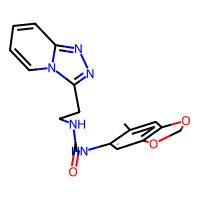
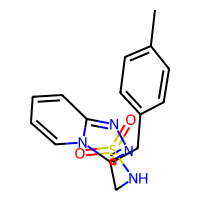
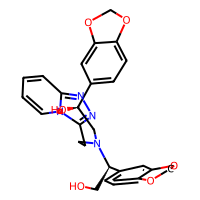
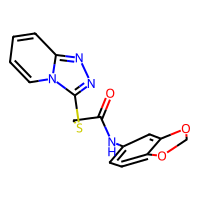
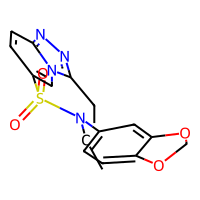
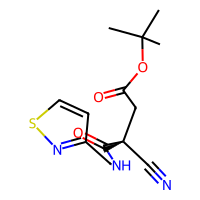
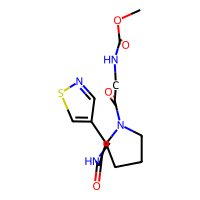
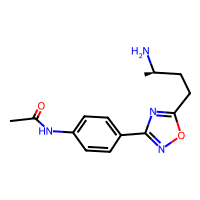
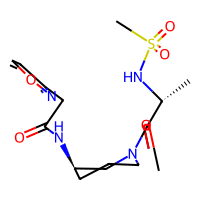
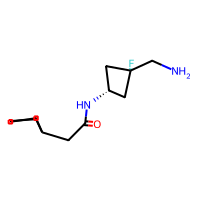

In [141]:
# test out calculating tanimoto distance and tversky index
df = PandasTools.LoadSDF('../designs/D68EV3CPROA_enumeration_oct10_2023.sdf')
df

,ID,ROMol
0,D68EV3CPROA-x0102_0B,
1,D68EV3CPROA-x0102_1B,
2,D68EV3CPROA-x0105_0A,
3,D68EV3CPROA-x0117_0A,
4,D68EV3CPROA-x0128_0A,
...,...,...
176,D68EV3CPROA-x2710_0A,
177,D68EV3CPROA-x2733_0A,
178,D68EV3CPROA-x2734_0A,
179,D68EV3CPROA-x2735_0A,

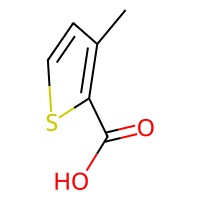
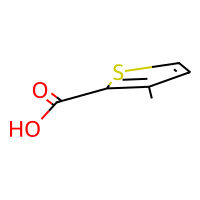
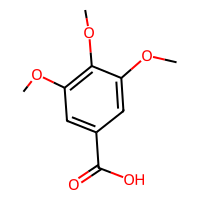
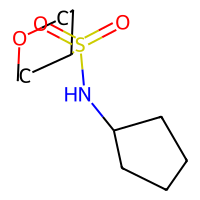
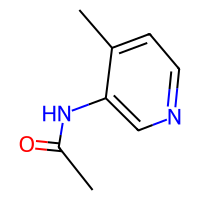
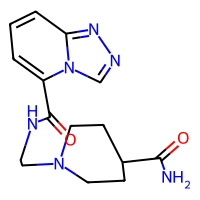
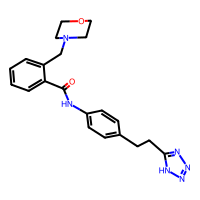
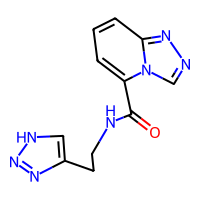
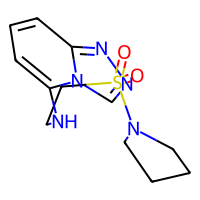
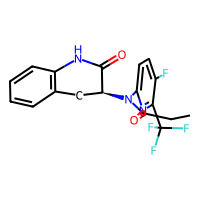

In [142]:
# get fragments SDF
frags = PandasTools.LoadSDF('../fragments/D68EV3CPROA_combined.sdf')
frags

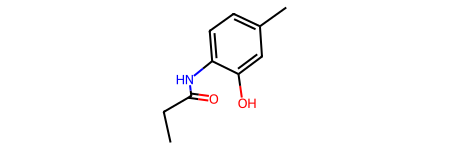

In [143]:
for i,row in df.iterrows():
    mol = row.ROMol
    frag_a = row['fragmentA']
    frag_b = row['fragmentB']
    frag_a_mol = frags[frags['ID'].str.contains(frag_a)].iloc[0].ROMol
    frag_b_mol = frags[frags['ID'].str.contains(frag_b)].iloc[0].ROMol
    # add tanimoto distance and tversky index to dataframe
    df.at[i, 'tanimotoA'] = ShapeTanimotoDist(mol, frag_a_mol)
    #row['tverskyA'] = ShapeTverskyIndex(mol, frag_a_mol)
    df.at[i, 'tanimotoB'] = ShapeTanimotoDist(mol, frag_b_mol)
    #row['tverskyB'] = ShapeTverskyIndex(mol, frag_b_mol)
frag_a_mol

In [144]:
columns_to_keep = ['smiles', 'fragmentA', 'fragmentB', 'tanimotoA', 'tanimotoB', 'ID', 'ROMol']
df = df[columns_to_keep]
df

,smiles,fragmentA,fragmentB,tanimotoA,tanimotoB,ID,ROMol
0,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,x1140_0A,x1594_0A,0.661857,0.701001,x1140_0A-x1594_0A_69-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcba0>
1,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,x1140_0A,x1594_0A,0.811154,0.730112,x1140_0A-x1594_0A_117-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcf20>
2,OCC(c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)CC(O)c1c...,x1140_0A,x1594_0A,0.654209,0.796969,x1140_0A-x1594_0A_94-P,<rdkit.Chem.rdchem.Mol object at 0x13f5be650>
3,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,x1140_0A,x1594_0A,0.575540,0.670292,x1140_0A-x1594_0A_49-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcac0>
4,CCc1nnc2ccc(S(=O)(=O)N(CC)c3ccc4c(c3)OCO4)cn12,x1594_0A,x1140_0A,0.791547,0.631392,x1594_0A-x1140_0A_133-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bdb60>
...,...,...,...,...,...,...,...
717,CC(C)(C)OC(=O)CC(C)(C#N)C(=O)NCc1ccsn1,x1498_0A,x2021_0A,0.826544,0.662169,x1498_0A-x2021_0A_476-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9230>
718,COC(=O)NCC(=O)N1CCCC1CNC(=O)Cc1cnsc1,x1071_0A,x1498_0A,0.653640,0.775709,x1071_0A-x1498_0A_304-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e92a0>
719,CC(=O)Nc1ccc(-c2noc(CCC(C)N)n2)cc1,x1020_0A,x0130_0A,0.870817,0.907173,x1020_0A-x0130_0A_88-1-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9310>
720,CC(NS(C)(=O)=O)C(=O)N1CCCC(NC(=O)Cc2ccon2)C1,x1071_0A,x2099_0A,0.653038,0.855131,x1071_0A-x2099_0A_162-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9380>


In [145]:
# add template column of fragment based on highest tanimoto distance
df['template'] = df.apply(lambda x: x['fragmentA'] if x['tanimotoA'] > x['tanimotoB'] else x['fragmentB'], axis=1)
df

/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_66379/221580239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['template'] = df.apply(lambda x: x['fragmentA'] if x['tanimotoA'] > x['tanimotoB'] else x['fragmentB'], axis=1)


,smiles,fragmentA,fragmentB,tanimotoA,tanimotoB,ID,ROMol,template
0,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,x1140_0A,x1594_0A,0.661857,0.701001,x1140_0A-x1594_0A_69-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcba0>,x1594_0A
1,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,x1140_0A,x1594_0A,0.811154,0.730112,x1140_0A-x1594_0A_117-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcf20>,x1140_0A
2,OCC(c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)CC(O)c1c...,x1140_0A,x1594_0A,0.654209,0.796969,x1140_0A-x1594_0A_94-P,<rdkit.Chem.rdchem.Mol object at 0x13f5be650>,x1594_0A
3,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,x1140_0A,x1594_0A,0.575540,0.670292,x1140_0A-x1594_0A_49-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcac0>,x1594_0A
4,CCc1nnc2ccc(S(=O)(=O)N(CC)c3ccc4c(c3)OCO4)cn12,x1594_0A,x1140_0A,0.791547,0.631392,x1594_0A-x1140_0A_133-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bdb60>,x1594_0A
...,...,...,...,...,...,...,...,...
717,CC(C)(C)OC(=O)CC(C)(C#N)C(=O)NCc1ccsn1,x1498_0A,x2021_0A,0.826544,0.662169,x1498_0A-x2021_0A_476-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9230>,x1498_0A
718,COC(=O)NCC(=O)N1CCCC1CNC(=O)Cc1cnsc1,x1071_0A,x1498_0A,0.653640,0.775709,x1071_0A-x1498_0A_304-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e92a0>,x1498_0A
719,CC(=O)Nc1ccc(-c2noc(CCC(C)N)n2)cc1,x1020_0A,x0130_0A,0.870817,0.907173,x1020_0A-x0130_0A_88-1-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9310>,x0130_0A
720,CC(NS(C)(=O)=O)C(=O)N1CCCC(NC(=O)Cc2ccon2)C1,x1071_0A,x2099_0A,0.653038,0.855131,x1071_0A-x2099_0A_162-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9380>,x2099_0A


In [146]:
df.rename(columns={'ID': 'compound_set'}, inplace=True)
df.template.value_counts()

/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_66379/4277854450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'ID': 'compound_set'}, inplace=True)


template
x1594_0A    172
x1498_0A    126
x1052_1A    103
x1083_0A     93
x1140_0A     46
x1071_0A     32
x0147_0A     31
x2099_0A     31
x2021_0A     29
x1919_0A     27
x0130_0A     24
x1020_0A      6
x0980_0B      2
Name: count, dtype: int64

In [147]:
# copy .pdbs with template name to new directory
for i,row in df.iterrows():
    template = row['template']
    pdb = glob2.glob(f'/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/apo_desolv/*{template}*.pdb')[0]
    # copy keeping original name
    orig_name = os.path.basename(pdb)
    # check if file already exists
    if os.path.exists(f'../fragments/templates/{orig_name}'):
        print(f'{pdb} already exists in ../fragments/templates/')
        continue
    shutil.copy(pdb, f'../fragments/templates/{orig_name}')
    print(f'copied {pdb} to ../fragments/templates/{orig_name}')

/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/apo_desolv/D68EV3CPROA-x1594_0A_apo-desolv.pdb already exists in ../fragments/templates/
/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/apo_desolv/D68EV3CPROA-x1140_0A_apo-desolv.pdb already exists in ../fragments/templates/
/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/apo_desolv/D68EV3CPROA-x1594_0A_apo-desolv.pdb already exists in ../fragments/templates/
/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/apo_desolv/D68EV3CPROA-x1594_0A_apo-desolv.pdb already exists in ../fragments/templates/
/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/apo_desolv/D68EV3CPROA-x1594_0A_apo-desolv.pdb already exists in ../fragments/templates/
/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/apo_desolv/D68EV3CPROA-x1594_0A_apo-desolv.pdb already exists in ../fragments/templates/
/Users/kate_fieseler/PycharmProjects/ret

In [148]:
# add inchi key
df['inchikey'] = df['ROMol'].apply(lambda mol: AllChem.MolToInchiKey(mol) if mol else None)
df

/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_66379/2316835400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inchikey'] = df['ROMol'].apply(lambda mol: AllChem.MolToInchiKey(mol) if mol else None)


,smiles,fragmentA,fragmentB,tanimotoA,tanimotoB,compound_set,ROMol,template,inchikey
0,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,x1140_0A,x1594_0A,0.661857,0.701001,x1140_0A-x1594_0A_69-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcba0>,x1594_0A,PCWLLOFUHNYYRG-UHFFFAOYSA-N
1,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,x1140_0A,x1594_0A,0.811154,0.730112,x1140_0A-x1594_0A_117-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcf20>,x1140_0A,MAYFCUDIGYMGSZ-UHFFFAOYSA-N
2,OCC(c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)CC(O)c1c...,x1140_0A,x1594_0A,0.654209,0.796969,x1140_0A-x1594_0A_94-P,<rdkit.Chem.rdchem.Mol object at 0x13f5be650>,x1594_0A,WXKPJYMZBOBKQH-WOJBJXKFSA-N
3,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,x1140_0A,x1594_0A,0.575540,0.670292,x1140_0A-x1594_0A_49-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bcac0>,x1594_0A,IQUYEHFSOUMANR-UHFFFAOYSA-N
4,CCc1nnc2ccc(S(=O)(=O)N(CC)c3ccc4c(c3)OCO4)cn12,x1594_0A,x1140_0A,0.791547,0.631392,x1594_0A-x1140_0A_133-P,<rdkit.Chem.rdchem.Mol object at 0x13f5bdb60>,x1594_0A,JXFIGYIDNXFQEE-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...
717,CC(C)(C)OC(=O)CC(C)(C#N)C(=O)NCc1ccsn1,x1498_0A,x2021_0A,0.826544,0.662169,x1498_0A-x2021_0A_476-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9230>,x1498_0A,SGPREIDORLHBIW-CQSZACIVSA-N
718,COC(=O)NCC(=O)N1CCCC1CNC(=O)Cc1cnsc1,x1071_0A,x1498_0A,0.653640,0.775709,x1071_0A-x1498_0A_304-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e92a0>,x1498_0A,FMMAFSBCKGOQJX-LLVKDONJSA-N
719,CC(=O)Nc1ccc(-c2noc(CCC(C)N)n2)cc1,x1020_0A,x0130_0A,0.870817,0.907173,x1020_0A-x0130_0A_88-1-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9310>,x0130_0A,FSEGSTIUCTVYNY-SECBINFHSA-N
720,CC(NS(C)(=O)=O)C(=O)N1CCCC(NC(=O)Cc2ccon2)C1,x1071_0A,x2099_0A,0.653038,0.855131,x1071_0A-x2099_0A_162-0-R,<rdkit.Chem.rdchem.Mol object at 0x1480e9380>,x2099_0A,AQWPCRSOKYQPKI-ZYHUDNBSSA-N


In [149]:
# drop duplicates
df.drop_duplicates(subset=['inchikey', 'fragmentA', 'fragmentB', 'template'], inplace=True)
if 'ROMol' in df.columns:
    df.drop(columns=['ROMol'], inplace=True)
df.rename(columns={'fragmentA': 'hit1', 'fragmentB':'hit2', 'tanimotoA':'shape_tanimoto1', 'tanimotoB':'shape_tanimoto2'}, inplace=True)

/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_66379/674891869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['inchikey', 'fragmentA', 'fragmentB', 'template'], inplace=True)
/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_66379/674891869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ROMol'], inplace=True)
/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_66379/674891869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [150]:
df 

,smiles,hit1,hit2,shape_tanimoto1,shape_tanimoto2,compound_set,template,inchikey
0,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,x1140_0A,x1594_0A,0.661857,0.701001,x1140_0A-x1594_0A_69-P,x1594_0A,PCWLLOFUHNYYRG-UHFFFAOYSA-N
1,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,x1140_0A,x1594_0A,0.811154,0.730112,x1140_0A-x1594_0A_117-P,x1140_0A,MAYFCUDIGYMGSZ-UHFFFAOYSA-N
2,OCC(c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)CC(O)c1c...,x1140_0A,x1594_0A,0.654209,0.796969,x1140_0A-x1594_0A_94-P,x1594_0A,WXKPJYMZBOBKQH-WOJBJXKFSA-N
3,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,x1140_0A,x1594_0A,0.575540,0.670292,x1140_0A-x1594_0A_49-P,x1594_0A,IQUYEHFSOUMANR-UHFFFAOYSA-N
4,CCc1nnc2ccc(S(=O)(=O)N(CC)c3ccc4c(c3)OCO4)cn12,x1594_0A,x1140_0A,0.791547,0.631392,x1594_0A-x1140_0A_133-P,x1594_0A,JXFIGYIDNXFQEE-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...
717,CC(C)(C)OC(=O)CC(C)(C#N)C(=O)NCc1ccsn1,x1498_0A,x2021_0A,0.826544,0.662169,x1498_0A-x2021_0A_476-0-R,x1498_0A,SGPREIDORLHBIW-CQSZACIVSA-N
718,COC(=O)NCC(=O)N1CCCC1CNC(=O)Cc1cnsc1,x1071_0A,x1498_0A,0.653640,0.775709,x1071_0A-x1498_0A_304-0-R,x1498_0A,FMMAFSBCKGOQJX-LLVKDONJSA-N
719,CC(=O)Nc1ccc(-c2noc(CCC(C)N)n2)cc1,x1020_0A,x0130_0A,0.870817,0.907173,x1020_0A-x0130_0A_88-1-R,x0130_0A,FSEGSTIUCTVYNY-SECBINFHSA-N
720,CC(NS(C)(=O)=O)C(=O)N1CCCC(NC(=O)Cc2ccon2)C1,x1071_0A,x2099_0A,0.653038,0.855131,x1071_0A-x2099_0A_162-0-R,x2099_0A,AQWPCRSOKYQPKI-ZYHUDNBSSA-N


In [151]:
# save to csv
df.to_csv('../designs/D68EV3CPROA_knitwork_722_syndirella_master.csv', index=False)

In [152]:
# save each row of master csv as a separate csv
for i, row in df.iterrows():
    # keep row names
    row_df = row.to_frame().T
    os.makedirs('/Users/kate_fieseler/PycharmProjects/EV-D68-3C-PROA-syndirella-run/syndirella_input', exist_ok=True)
    row_df.to_csv(f'../syndirella_input/syndirella_input{i}.csv', index=True)

In [153]:
# Define the file path
file_path = '../template.sh'

# Define the string to search and the replacement string
search_string = 'NUM'

for i in range(len(df)):
    replacement_string = str(i)
    
    # Open the file, read its contents, replace the occurrences, and write it back
    with open(file_path, 'r') as file:
        file_contents = file.read()
    
    # Replace the occurrences of the search string with the replacement string
    new_contents = file_contents.replace(search_string, replacement_string)
    
    new_path = f'../jobs/job{i}.sh'
    
    # If you want to write to a new file, you can do:
    with open(new_path, 'w') as new_file:
        new_file.write(new_contents)

print("Replacement complete.")

Replacement complete.


In [154]:
with open('../job_list.txt', 'w') as f:
    for i in range(len(df)):
        f.write(f'job{i}.sh\n')